In [1]:
# Import Required Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Set Dataset Paths
dataset_root_path = 'idd20k_lite'

gt_train_path = os.path.join(dataset_root_path, 'gtFine/train')
gt_val_path = os.path.join(dataset_root_path, 'gtFine/val')

img_train_path = os.path.join(dataset_root_path, 'leftImg8bit/train')
img_val_path = os.path.join(dataset_root_path, 'leftImg8bit/val')
img_test_path = os.path.join(dataset_root_path, 'leftImg8bit/test')

print(f'Number of training images: {len(os.listdir(img_train_path))}')
print(f'Number of validation images: {len(os.listdir(img_val_path))}')
print(f'Number of test images: {len(os.listdir(img_test_path))}')

Number of training images: 310
Number of validation images: 62
Number of test images: 100


In [3]:
# Load Image and Ground Truth
data_dir_name = '0'
img_code = '024541'

img_path = os.path.join(img_train_path, f'{data_dir_name}/{img_code}_image.jpg')
label_path = os.path.join(gt_train_path, f'{data_dir_name}/{img_code}_label.png')
inst_label_path = os.path.join(gt_train_path, f'{data_dir_name}/{img_code}_inst_label.png')

img = cv2.imread(img_path)
label = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)  # Load label as grayscale
inst_label = cv2.imread(inst_label_path, cv2.IMREAD_GRAYSCALE)  # Load instance label as grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [39]:
# Overlay Ground Truth on Image
def overlay_ground_truth(image, label, alpha=0.5):
    """
    Overlay the ground truth label on the image with transparency.
    
    Args:
        image (np.ndarray): The original image.
        label (np.ndarray): The ground truth label.
        alpha (float): Transparency factor for the overlay.
    
    Returns:
        np.ndarray: The image with the ground truth overlay.
    """
    # Define a color map for the labels
    color_map = {
        255: [0, 0, 0],     # Class 255 (ignore label)
        0: [255, 0, 0],     # Class 0
        2: [0, 255, 0],     # Class 2
        3: [0, 0, 255],     # Class 3
        4: [255, 255, 0],   # Class 4
        5: [0, 255, 255],   # Class 5
        6: [255, 0, 255],   # Class 6
    }
    
    # Create a blank RGB image for the label
    label_color = np.zeros_like(image)

    # Map each unique label to its corresponding color
    for label_value, color in color_map.items():
        label_color[label == label_value] = color

    # Overlay the label on the image
    overlay = cv2.addWeighted(image, 1 - alpha, label_color, alpha, 0)
    return overlay

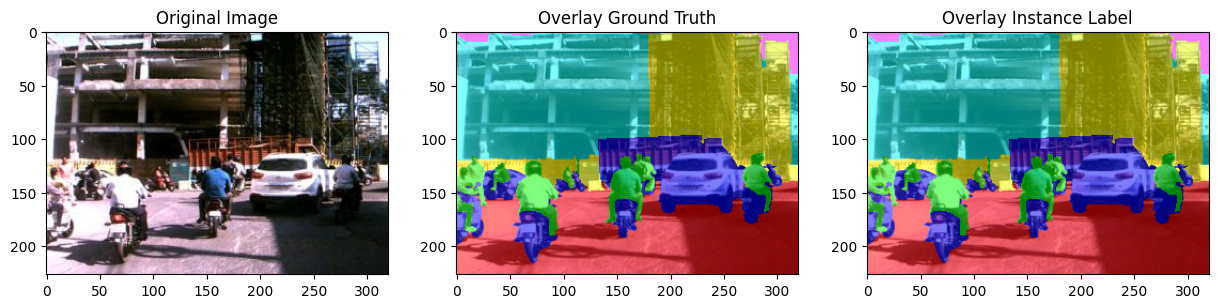

In [40]:
# Visualize with Different Colors
overlay_label = overlay_ground_truth(img, label)
overlay_inst_label = overlay_ground_truth(img, inst_label)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(overlay_label)
plt.title('Overlay Ground Truth')

plt.subplot(1, 3, 3)
plt.imshow(overlay_inst_label, cmap='gray')
plt.title('Overlay Instance Label')
plt.show()